# **Análise de Dados Pré-Respetivo Tratamento**

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib inline

## Carregar os dataset de treino e de teste

In [56]:
TRAINING_DATASET_SOURCE = 'training_data.csv'
TEST_DATASET_SOURCE = 'test_data.csv'

In [57]:
train_df = pd.read_csv(TRAINING_DATASET_SOURCE)
test_df = pd.read_csv(TEST_DATASET_SOURCE)

## Exploração de dados

In [4]:
train_df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [5]:
train_df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


- Quantidade de valores únicos de cada feature

In [7]:
for column in train_df.columns:
    train_df[column].value_counts()

- Análise dos valores da feature **avg_precipitation**

In [8]:
train_df['avg_precipitation'].value_counts()

0.0    5000
Name: avg_precipitation, dtype: int64

- Definição do primeiro e do terceiro quartis
- Definição do valor máximo (*upper*) e mínimo (*lower*)

In [ ]:
numeric_columns = ['avg_temperature', 'avg_atm_pressure', 'avg_humidity', 'avg_wind_speed',
                   'delay_in_seconds', 'avg_precipitation']
categorical_columns = ['city_name', 'magnitude_of_delay', 'luminosity', 'avg_rain',
                       'affected_roads', 'record_date']

In [ ]:
whiskers = []

for num in numeric_columns:
    Q1 = train_df[num].quantile(0.25)
    Q3 = train_df[num].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    whiskers.append((num, lower, upper))

print(whiskers)

## Visualização gráfica dos dados

- Matriz de correlação para valores numéricos

In [ ]:
correlationMatrix = train_df.corr()
f, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(correlationMatrix, vmin=-1, vmax=1, square=True, annot=True)

- Distribuições bivariadas de pares num conjunto de dados

In [ ]:
sns.pairplot(train_df)

- Diagrama de caixa para cada feature numérica

In [ ]:
for num in numeric_columns:
    fig = plt.figure(figsize=(10, 5))
    sns.boxplot(train_df[num])
    plt.title('Box Plot: Feature ' + num, fontsize=15)
    plt.show()

In [ ]:
sns.catplot(x='incidents', y='delay_in_seconds', data=train_df, kind='box', aspect=1.5)

- Quantidade de valores nulos em cada feature

In [ ]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Histogramas para cada feature categórica

In [ ]:
for categ in categorical_columns:
    fig = plt.figure(figsize=(10, 5))
    sns.histplot(train_df[categ])

###### Observação do número de vezes que cada categoria da feature **avg_rain** aparece

In [ ]:
train_df['avg_rain'].value_counts()

- Histograma de um conjunto univariante de observações da feature **incidents** (target)

In [ ]:
train_df['incidents'].unique()
train_df['incidents'] = pd.Categorical(train_df['incidents'], categories=['None', 'Low', 'Medium', 'High', 'Very_High'])
sns.displot(train_df['incidents'], kde=True)

- Histograma de um conjunto univariante de observações da feature **avg_wind_speed**

In [ ]:
sns.displot(train_df['avg_wind_speed'], kde=True)

- Histograma e outras informações uteis de um conjunto univariante de observações da feature **delay_in_seconds**

In [ ]:
sns.displot(train_df['delay_in_seconds'], kde=True)

plt.ylim(0, 150)

In [ ]:
train_df['delay_in_seconds'].describe()

In [ ]:
sns.displot(train_df[train_df['delay_in_seconds'] > 10000]['delay_in_seconds'], kde=True)

plt.ylim(0, 50)

## Relação entre Features

- Relação entre a feature avg_rain e a feature incidents (target)

In [ ]:
train_df.groupby(by=['avg_rain', 'incidents']).count()

- Relação entre a feature magnitude_of_delay e a feature incidents (target)

In [ ]:
train_df.groupby(by=['magnitude_of_delay', 'incidents']).count()

In [ ]:
train_df.groupby(by=['delay_in_seconds', 'incidents']).mean()

# Análise do dataset de teste

In [4]:
test_df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain
0,Guimaraes,UNDEFINED,1211,"N101,N101,N101,N101,N101,N101,",2021-04-13 19:00,LIGHT,15.0,1018.0,80.0,0.0,0.0,Sem Chuva
1,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-13 04:00,DARK,16.0,1018.0,41.0,2.0,0.0,Sem Chuva
2,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-18 19:00,LIGHT,22.0,1017.0,71.0,0.0,0.0,Sem Chuva
3,Guimaraes,UNDEFINED,140,"N101,R206,N101,N101,N101,N101",2021-10-30 15:00,LIGHT,18.0,1008.0,81.0,3.0,0.0,Sem Chuva
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-18 10:00,LIGHT,20.0,1022.0,86.0,0.0,0.0,Sem Chuva


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           1206 non-null   object 
 1   magnitude_of_delay  1206 non-null   object 
 2   delay_in_seconds    1206 non-null   int64  
 3   affected_roads      1184 non-null   object 
 4   record_date         1206 non-null   object 
 5   luminosity          1206 non-null   object 
 6   avg_temperature     1206 non-null   float64
 7   avg_atm_pressure    1206 non-null   float64
 8   avg_humidity        1206 non-null   float64
 9   avg_wind_speed      1206 non-null   float64
 10  avg_precipitation   1206 non-null   float64
 11  avg_rain            1206 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 113.2+ KB


In [7]:
train_df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [6]:
test_df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.0
mean,565.080431,14.649254,1018.024876,73.865672,1.332504,0.0
std,1584.544376,4.691180,5.338753,17.202341,1.337510,0.0
min,0.000000,2.000000,999.000000,7.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,62.000000,0.000000,0.0
50%,0.000000,14.000000,1018.000000,77.000000,1.000000,0.0
75%,268.750000,18.000000,1022.000000,90.000000,2.000000,0.0
max,14866.000000,30.000000,1031.000000,100.000000,9.000000,0.0


In [16]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

temp_df = train_df.copy()

temp_df['delay_in_seconds'] = train_df['delay_in_seconds'].map(lambda seconds: seconds / 60)

pd.DataFrame(std_scaler.fit_transform(train_df[['delay_in_seconds']])).describe()


,0
count,5.000000e+03
mean,1.563194e-17
std,1.000100e+00
min,-3.323472e-01
25%,-3.323472e-01
50%,-3.323472e-01
75%,-1.936140e-01
max,1.809604e+01


In [8]:
train_df.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [9]:
test_df.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        22
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
dtype: int64

In [85]:
def convert_record_date(df: pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()

    record_date = pd.DatetimeIndex(df_['record_date'])

    df_.drop('record_date', axis=1, inplace=True)

    df_['hour'] = record_date.hour
    df_['day'] = record_date.day
    df_['month'] = record_date.month
    df_['weekday'] = record_date.weekday
    df_['hour'] = record_date.hour
    df_['minute'] = record_date.minute

    return df_


train_df = convert_record_date(train_df)

In [86]:
train_df['hour'].value_counts()

3     223
9     217
7     214
13    213
6     212
14    212
4     210
0     209
1     209
5     209
20    208
2     208
11    207
15    207
8     206
10    206
19    206
12    206
16    206
23    206
22    204
17    203
18    201
21    198
Name: hour, dtype: int64

In [87]:
train_df['day'].value_counts()

22    185
23    183
18    181
20    180
21    176
3     176
2     175
24    174
19    174
11    173
28    169
16    168
17    165
12    165
4     164
30    163
26    161
25    160
5     160
29    160
10    159
9     157
6     155
13    155
15    154
27    153
14    151
8     146
7     145
1     144
31     69
Name: day, dtype: int64

In [88]:
train_df['month'].value_counts()

12    607
3     580
11    580
4     579
10    562
6     560
7     551
9     393
1     299
5     229
2      60
Name: month, dtype: int64

In [89]:
train_df['weekday'].value_counts()

2    734
1    725
3    723
4    711
6    707
0    706
5    694
Name: weekday, dtype: int64

In [90]:
train_df['hour'].value_counts()

3     223
9     217
7     214
13    213
6     212
14    212
4     210
0     209
1     209
5     209
20    208
2     208
11    207
15    207
8     206
10    206
19    206
12    206
16    206
23    206
22    204
17    203
18    201
21    198
Name: hour, dtype: int64

In [91]:
train_df['minute'].value_counts()

0    5000
Name: minute, dtype: int64

## Comparação dos dados do dataset de treino com os dados do dataset de teste

In [92]:
train_df[train_df.duplicated()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents,hour,day,month,weekday,minute


In [93]:
test_df[test_df.duplicated()]


,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain


### Obtenção das features númericas

In [94]:
[column for column, dtype in zip(train_df.columns, train_df.dtypes) if dtype.kind in ['i', 'f']]

['delay_in_seconds',
 'avg_temperature',
 'avg_atm_pressure',
 'avg_humidity',
 'avg_wind_speed',
 'avg_precipitation',
 'hour',
 'day',
 'month',
 'weekday',
 'minute']

### Obtenção das features categoricas

In [95]:
[column for column, dtype in zip(train_df.columns, train_df.dtypes) if dtype.kind not in ['i', 'f']]

['city_name',
 'magnitude_of_delay',
 'affected_roads',
 'luminosity',
 'avg_rain',
 'incidents']

In [97]:
train_df = train_df.drop('incidents', axis=1)
test_df = convert_record_date(test_df)

train_unique = train_df.nunique()
test_unique = test_df.nunique()
unique_df = pd.DataFrame(columns=['Train', 'Test'])

unique_df['Train'] = train_unique
unique_df['Test'] = test_unique

unique_df

,Train,Test
city_name,1,1
magnitude_of_delay,3,3
delay_in_seconds,1186,400
affected_roads,678,205
luminosity,3,3
avg_temperature,35,29
avg_atm_pressure,36,31
avg_humidity,83,77
avg_wind_speed,11,9
avg_precipitation,1,1


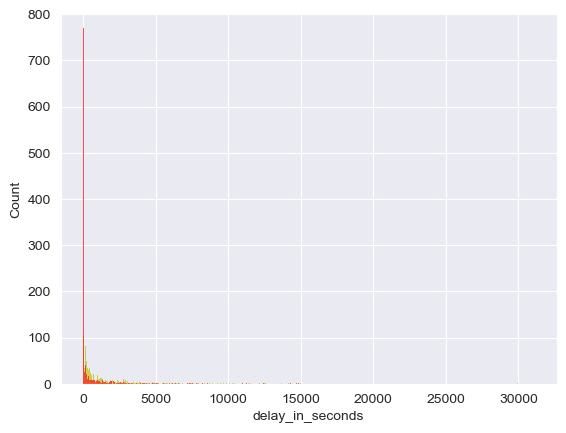

In [105]:
sns.histplot(train_df['delay_in_seconds'], fill=True, color='y')
sns.histplot(test_df['delay_in_seconds'], fill=True, color="r")

plt.ylim(0, 800)

plt.show()

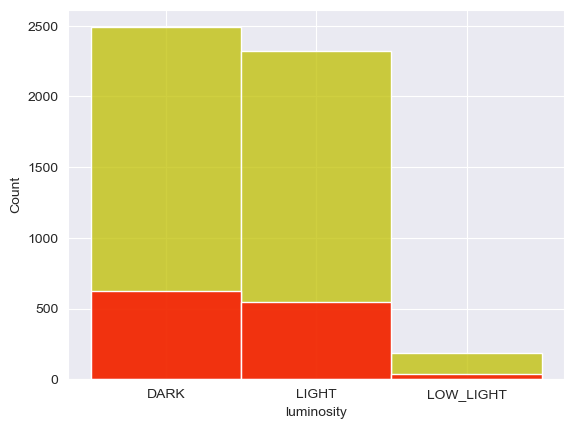

In [99]:
sns.histplot(train_df['luminosity'], fill=True, color='y')
sns.histplot(test_df['luminosity'], fill=True, color="r")

plt.show()

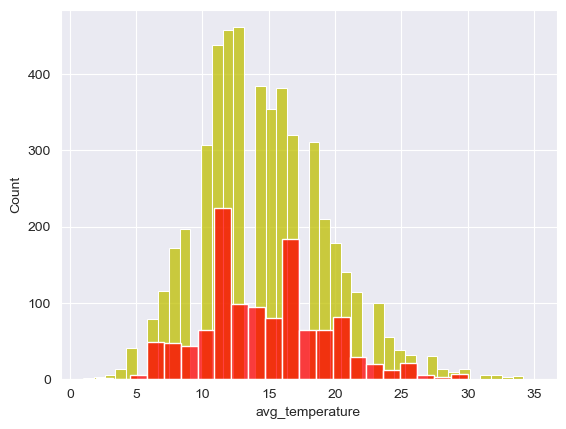

In [100]:
sns.histplot(train_df['avg_temperature'], fill=True, color='y')
sns.histplot(test_df['avg_temperature'], fill=True, color="r")

plt.show()